In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
 

In [8]:
print('hello')

hello


# STEP 1: Basic Understanding of Data

In [9]:

df = pd.read_csv("disney_plus_titles.csv")
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


# STEP 2: Check Missing Values

In [14]:

df.isnull().sum()



show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

# STEP 3: Handle Missing Values

In [18]:
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)

df.dropna(subset=['date_added'], inplace=True)


# STEP 4: Convert Date Column

In [19]:


df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


# STEP 5: Movie vs TV Show Count

In [20]:
df['type'].value_counts()


type
Movie      1052
TV Show     395
Name: count, dtype: int64

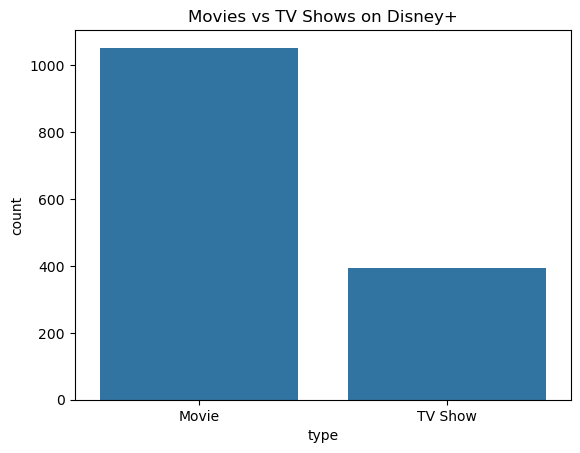

In [21]:


sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Disney+")
plt.show()


# STEP 6: Content Added Per Year

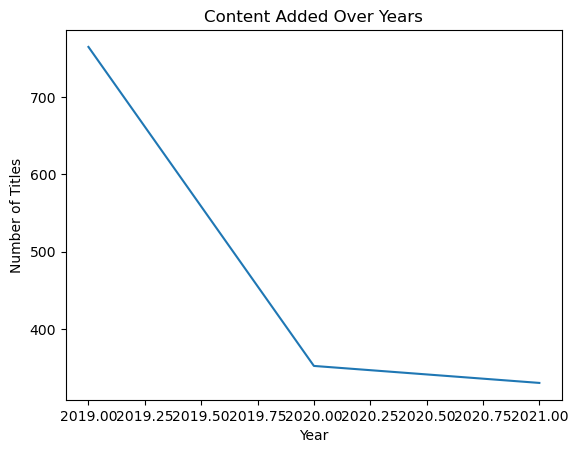

In [22]:
yearly_content = df['year_added'].value_counts().sort_index()

yearly_content.plot(kind='line')
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


# STEP 7: Top 10 Countries

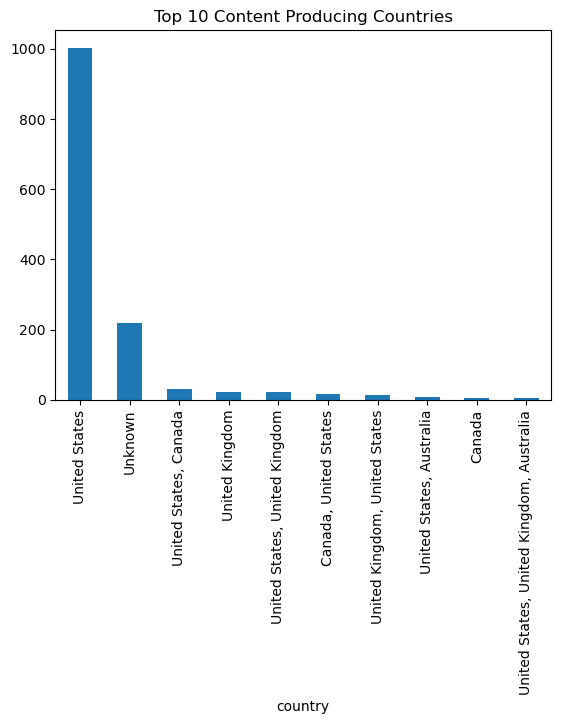

In [23]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.show()


# STEP 8: Duration Analysis (Statistics Part)

In [24]:
movies = df[df['type'] == 'Movie']

movies['duration'] = movies['duration'].str.replace(" min","")
movies['duration'] = movies['duration'].astype(float)

print("Mean duration:", movies['duration'].mean())
print("Median duration:", movies['duration'].median())
print("Std deviation:", movies['duration'].std())


Mean duration: 71.9106463878327
Median duration: 85.0
Std deviation: 40.595585019595575


# STEP 9: Hypothesis Testing

In [25]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(movies['duration'], 90)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -14.452804030784465
P-value: 2.557394308320167e-43


# STEP 10: Genre Analysis

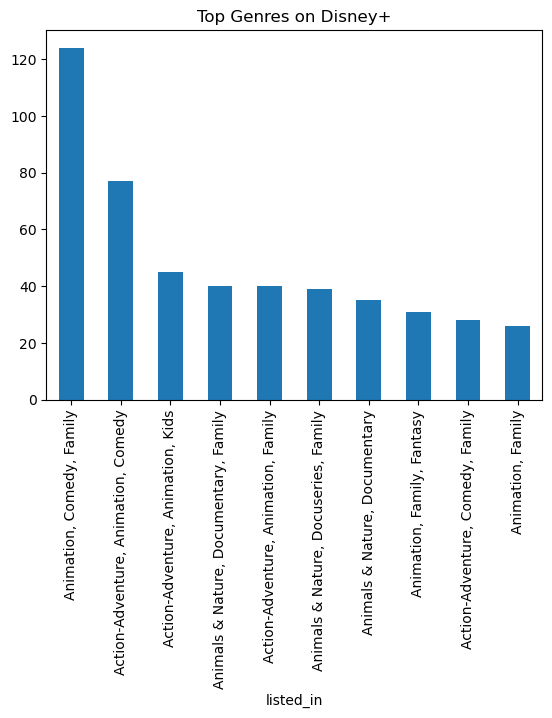

In [27]:
top_genres = df['listed_in'].value_counts().head(10)

top_genres.plot(kind='bar')
plt.title("Top Genres on Disney+")
plt.show()


## Inference

Disney+ has more Movies than TV Shows

Content increased sharply after 2019

USA produces most content

Average movie duration is around X minutes

Statistical test shows duration significantly differs from 90 minutes